# Map and Distance
### This contains two additional preliminary tasks:
- Make club distance matrix - normalized
- Map the data including boundaries

### Make a distance matrix

In [1]:
%matplotlib inline
import pandas as pd
from scipy.spatial import distance_matrix
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

I only need the club number, lat (y), and long (x).

In [2]:
coords = pd.read_csv('clubs_cleaned.csv', usecols = ['club_no', 'lat', 'long'])
coords.set_index('club_no', inplace=True)
coords.head()

,lat,long
club_no,,
5509,33.3672,-94.2356
7036,33.3672,-94.2356
9682,32.5072,-93.7444
584009,32.5153,-93.6345
1100434,33.3672,-94.2356


In [3]:
dist = pd.DataFrame(distance_matrix(coords.values, coords.values), index=coords.index, columns=coords.index)
dist.head()

club_no,5509,7036,9682,584009,1100434,718,4819,9790,5069647,7575630,...,1783,596735,4700632,5258000,2690,8569,3929213,4822437,5569,1565753
club_no,,,,,,,,,,,,,,,,,,,,,
5509,0.000000,0.000000,0.990393,1.042619,0.000000,0.990393,1.097523,0.964130,1.234703,0.988622,...,2.593566,2.457343,2.534879,2.534879,2.514947,2.534879,2.534879,2.577216,2.534879,2.534879
7036,0.000000,0.000000,0.990393,1.042619,0.000000,0.990393,1.097523,0.964130,1.234703,0.988622,...,2.593566,2.457343,2.534879,2.534879,2.514947,2.534879,2.534879,2.577216,2.534879,2.534879
9682,0.990393,0.990393,0.000000,0.110198,0.990393,0.000000,0.114495,0.080071,0.358221,0.035333,...,3.088702,2.974391,3.029603,3.029603,3.003926,3.029603,3.029603,3.080480,3.029603,3.029603
584009,1.042619,1.042619,0.110198,0.000000,1.042619,0.110198,0.153678,0.080559,0.250577,0.143635,...,3.196250,3.081197,3.137092,3.137092,3.111530,3.137092,3.137092,3.187806,3.137092,3.137092
1100434,0.000000,0.000000,0.990393,1.042619,0.000000,0.990393,1.097523,0.964130,1.234703,0.988622,...,2.593566,2.457343,2.534879,2.534879,2.514947,2.534879,2.534879,2.577216,2.534879,2.534879


This is in degrees which is fine. We don't need the distance in miles. 

Normalize the matrix

In [4]:
n_dist = pd.DataFrame(MinMaxScaler().fit_transform(dist), index=dist.index, columns=dist.columns)

In [5]:
n_dist.head()

club_no,5509,7036,9682,584009,1100434,718,4819,9790,5069647,7575630,...,1783,596735,4700632,5258000,2690,8569,3929213,4822437,5569,1565753
club_no,,,,,,,,,,,,,,,,,,,,,
5509,0.000000,0.000000,0.309451,0.315310,0.000000,0.309451,0.338685,0.297754,0.347098,0.311623,...,0.752496,0.737553,0.748308,0.748308,0.748079,0.748308,0.748308,0.749572,0.748308,0.748308
7036,0.000000,0.000000,0.309451,0.315310,0.000000,0.309451,0.338685,0.297754,0.347098,0.311623,...,0.752496,0.737553,0.748308,0.748308,0.748079,0.748308,0.748308,0.749572,0.748308,0.748308
9682,0.360002,0.360002,0.000000,0.033326,0.360002,0.000000,0.035332,0.024728,0.100703,0.011137,...,0.896155,0.892741,0.894353,0.894353,0.893528,0.894353,0.894353,0.895944,0.894353,0.894353
584009,0.378986,0.378986,0.034432,0.000000,0.378986,0.034432,0.047424,0.024879,0.070442,0.045275,...,0.927359,0.924798,0.926084,0.926084,0.925535,0.926084,0.926084,0.927159,0.926084,0.926084
1100434,0.000000,0.000000,0.309451,0.315310,0.000000,0.309451,0.338685,0.297754,0.347098,0.311623,...,0.752496,0.737553,0.748308,0.748308,0.748079,0.748308,0.748308,0.749572,0.748308,0.748308


In [6]:
# Save our work
# This leaves the first column as the club numbers (remember when using later)
n_dist.to_csv('club_distance_matrix.csv')

### Map current district alignment

In [7]:
clubs = pd.read_csv('clubs_to_realign.csv')
clubs.head()

,area,club_no,current_members,goals,division,new_members,awards,zip,lat,long,participation,retention,n_participation,n_retention,n_members
0,11,5509,15,4,E,1,9,75501,33.3672,-94.2356,0.6,0.933333,0.24,0.906667,0.274510
1,11,7036,10,3,E,2,5,75501,33.3672,-94.2356,0.5,0.800000,0.20,0.720000,0.176471
2,11,9682,12,4,E,1,6,71101,32.5072,-93.7444,0.5,0.916667,0.20,0.883333,0.215686
3,11,584009,8,2,E,3,4,71110,32.5153,-93.6345,0.5,0.625000,0.20,0.475000,0.137255
4,11,1100434,8,5,E,0,16,75501-6314,33.3672,-94.2356,2.0,1.000000,0.80,1.000000,0.137255


In [8]:
# Convert the clubs dataframe to a geodataframe
g_clubs = gpd.GeoDataFrame(clubs, 
                           geometry=gpd.points_from_xy(clubs.long, clubs.lat),
                           crs="EPSG:4326")

In [9]:
# Save the geopackage
g_clubs.to_file("g_clubs.gpkg", driver="GPKG")

In [10]:
extent = (-97.0, -93.3, 32.1, 33.7)

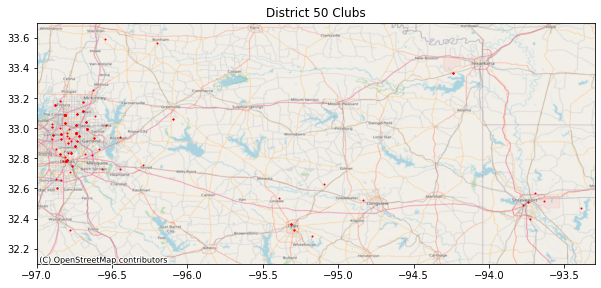

In [11]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.axis(extent)
ax.set_title('District 50 Clubs')
ax.plot(g_clubs.long, g_clubs.lat, 'o', markersize=1, color='red')
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

Check if it makes sense to draw areas. Areas with 2 clubs will appear as a line which is fine for now.

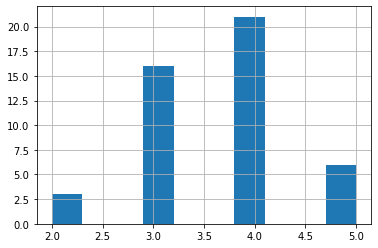

In [12]:
# Check distribution of clubs - most have 4 or 3 after previous data cleaning
clubs.groupby('area').count()['club_no'].hist();

Aggregate areas for plotting

In [13]:
# Dissolve groups the points into single objects which are a list of points
areas = g_clubs.dissolve(by='area')['geometry']
areas.head()

area
11    MULTIPOINT (-94.23560 33.36720, -93.74440 32.5...
12    MULTIPOINT (-93.77620 32.49180, -93.74440 32.5...
13    MULTIPOINT (-95.38970 32.53380, -95.30990 32.3...
14    MULTIPOINT (-95.30990 32.36680, -95.29080 32.3...
15    MULTIPOINT (-96.44540 32.93890, -96.29280 32.7...
Name: geometry, dtype: geometry

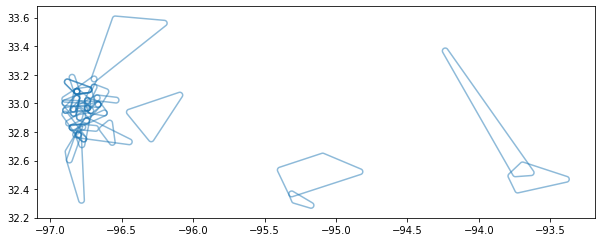

In [14]:
# Convex Hull draws a polygon around the points
# Buffer smooths the corners
# Boundary outlines the polygon
area_poly = areas.convex_hull.buffer(0.02)
area_boundaries = area_poly.boundary
area_boundaries.plot(figsize=(10, 10), alpha=0.5);

In [15]:
# Repeat with divisions
divisions = g_clubs.dissolve(by='division')['geometry']
division_poly = divisions.convex_hull.buffer(0.03)
# Draw a boundary for better visibility
division_boundaries = division_poly.boundary

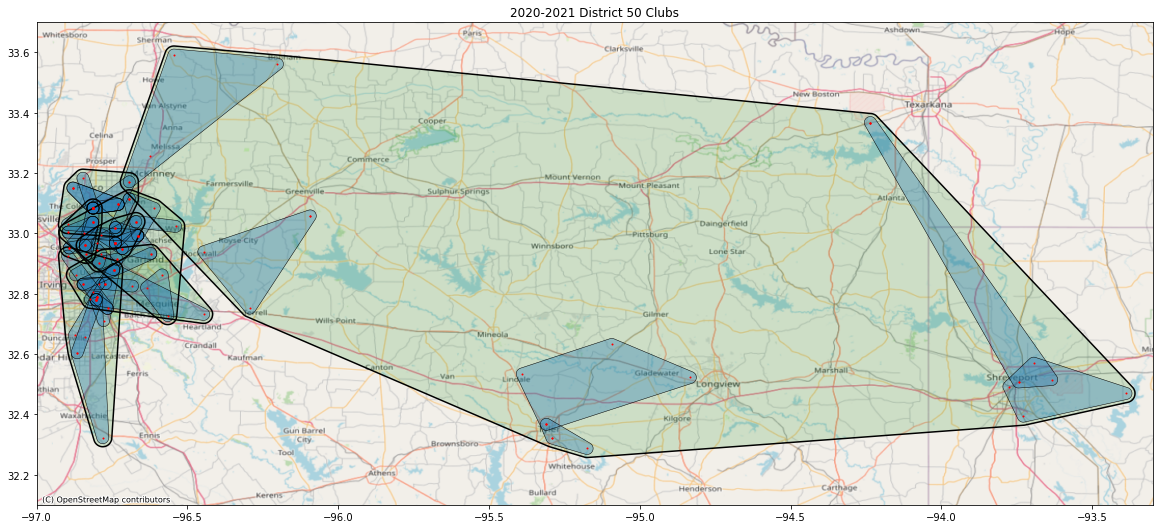

In [17]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.axis(extent)
ax.set_title('2020-2021 District 50 Clubs')
ax.plot(g_clubs.long, g_clubs.lat, 'o', markersize=1, color='red')
division_poly.plot(ax=ax, alpha=0.15, color='green')
division_boundaries.plot(ax=ax, color='black')
area_poly.plot(ax=ax, alpha=0.35)
area_boundaries.plot(ax=ax, color='black', linewidth=0.5)
# Incidentally, EPSG 4326 was the only one I could get to work.
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.OpenStreetMap.Mapnik)
#plt.savefig('D50_alignment_old.png', dpi=1200)
plt.show()

Many areas are not very visible because they are a line or a point.